# Probability Ratio Encoding

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
titanic=pd.read_csv('titanic.csv',usecols=['Survived','Cabin'])#,usecols=np.r_[10:12],)
titanic.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [24]:
titanic['Cabin'].fillna("Missing",inplace=True)
titanic.head()
titanic['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [27]:
titanic['Cabin']=titanic['Cabin'].astype(str).str[0]
titanic.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [28]:
titanic['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [32]:
prob_titanic=titanic.groupby('Cabin')['Survived'].mean().sort_values(ascending=True)
prob_titanic=pd.DataFrame(prob_titanic)

<AxesSubplot:xlabel='Cabin'>

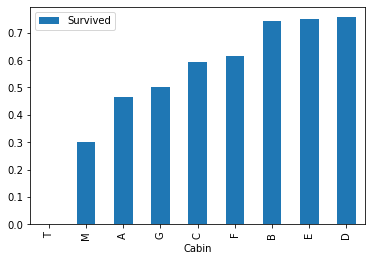

In [35]:
prob_titanic.plot.bar()

In [36]:
prob_titanic

,Survived
Cabin,
T,0.000000
M,0.299854
A,0.466667
G,0.500000
C,0.593220
F,0.615385
B,0.744681
E,0.750000
D,0.757576


In [38]:
prob_titanic['passedaway']=1-prob_titanic['Survived']
prob_titanic

,Survived,passedaway
Cabin,,
T,0.000000,1.000000
M,0.299854,0.700146
A,0.466667,0.533333
G,0.500000,0.500000
C,0.593220,0.406780
F,0.615385,0.384615
B,0.744681,0.255319
E,0.750000,0.250000
D,0.757576,0.242424


In [43]:
prob_titanic['ProbabilityRatio'] =(prob_titanic['Survived']/prob_titanic['passedaway'])
prob_titanic

,Survived,passedaway,Probability Ratio Encoding,Probability Ratio,ProbabilityRatio
Cabin,,,,,
T,0.000000,1.000000,0.000000,0.000000,0.000000
M,0.299854,0.700146,0.428274,0.428274,0.428274
A,0.466667,0.533333,0.875000,0.875000,0.875000
G,0.500000,0.500000,1.000000,1.000000,1.000000
C,0.593220,0.406780,1.458333,1.458333,1.458333
F,0.615385,0.384615,1.600000,1.600000,1.600000
B,0.744681,0.255319,2.916667,2.916667,2.916667
E,0.750000,0.250000,3.000000,3.000000,3.000000
D,0.757576,0.242424,3.125000,3.125000,3.125000


In [49]:
prob_titanic['ProbabilityRatio'].to_dict()

{'T': 0.0,
 'M': 0.42827442827442824,
 'A': 0.875,
 'G': 1.0,
 'C': 1.4583333333333333,
 'F': 1.6000000000000003,
 'B': 2.916666666666666,
 'E': 3.0,
 'D': 3.125}

In [50]:
#going to add this below new column into base 'titanic'data with the Cabin column

probab_encoded=prob_titanic['ProbabilityRatio'].to_dict()

titanic['probab_encoded']=titanic['Cabin'].map(probab_encoded)
titanic.head(10)

,Survived,Cabin,probab_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
5,0,M,0.428274
6,0,E,3.000000
7,0,M,0.428274
8,1,M,0.428274
9,1,M,0.428274


# Standardization & Normalization

# Transformation works for Linear / Logistic REgression(Gradien Descent)
#KNN,K means, Hierarchial clustering (Eucledian Distance)

#Techniques to do 
1.Norm & Stdardization
2.Minima & Maxima Scaling
3.Scaling to Median & Quantiles
4.Gaussian Transformation
  a. Lograthimic transformation
  b. Sq.root transfo
  c.Exponential transfo
d.Reciprocal transfo
e.Boxcox Transfo


In [52]:
#Standardization 
Z=(x-X_mean)/Std.

In [55]:
data=pd.read_csv('titanic.csv',usecols=['Pclass','Age','Fare','Survived'])#,usecols=np.r_[10:12],)
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [59]:
data['Age'].fillna(data.Age.median(),inplace=True)


In [62]:
data.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [65]:
#StandardScaler library from sklearn

from sklearn.preprocessing import StandardScaler

In [70]:
scaler=StandardScaler()

data_scalar=scaler.fit_transform(data)
pd.DataFrame(data_scalar)


,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [74]:
data_scalar

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <BarContainer object of 20 artists>)

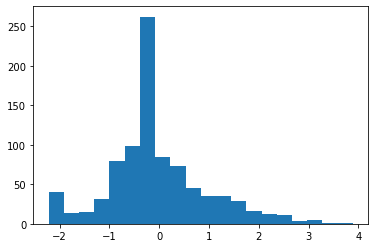

In [73]:
plt.hist(data_scalar[:,2],bins=20)  #age column in histogram

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <BarContainer object of 20 artists>)

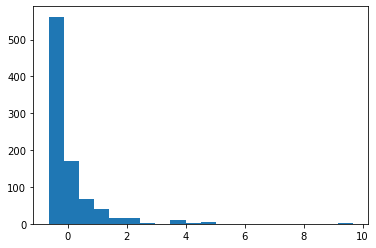

In [79]:
plt.hist(data_scalar[:,3],bins=20)  #Fare column in histogram (right skewed)

# Min Max Scaling , values between 0 & 1
#also used in CNN Deep Learning technique
    
    X_Scale= (X-X.mn)/(X.max-X.min)

In [84]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()
data_minmax=pd.DataFrame(min_max.fit_transform(data),columns=data.columns)
data_minmax

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


In [101]:
feautes_with_na= [features for features in data_minmax.columns if data_minmax[features].dtypes!='O']
             
feautes_with_na

['Survived', 'Pclass', 'Age', 'Fare']

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

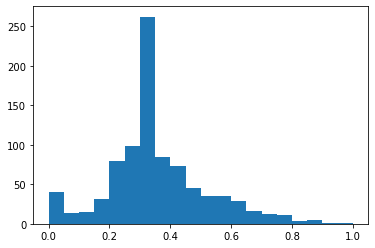

In [86]:
plt.hist(data_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

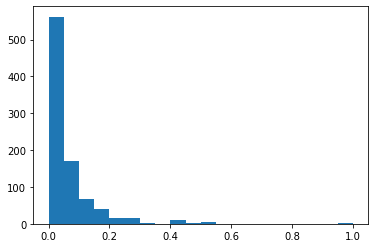

In [102]:
plt.hist(data_minmax['Fare'],bins=20)

#Robust Scaler

#it is used to scale the features to Median & Quantile

#advantage: to identify the Inter-Quantile range

#Inter-Quantile range formula is = (75th quantile - 25th Qantile)

#X_scaled = (X-X.median)/IQR


In [104]:
from sklearn.preprocessing import RobustScaler

In [105]:
scaler=RobustScaler()
data_robustscaler=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data_robustscaler

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

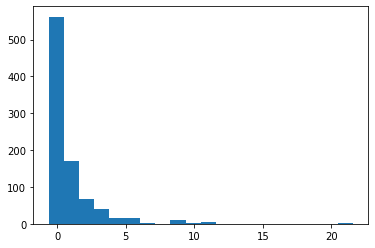

In [106]:
plt.hist(data_robustscaler['Fare'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

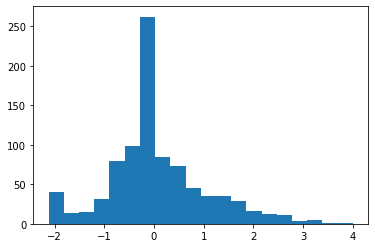

In [107]:
plt.hist(data_robustscaler['Age'],bins=20)

# Gaussian Transformation

In [108]:
#Lograthimic Transformation


In [111]:
log_titanic=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])#,usecols=np.r_[10:12],)

log_titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [113]:
log_titanic.isnull().sum()

#so there are null values in Age column

Survived      0
Age         177
Fare          0
dtype: int64

In [119]:
feautes_with_na= [features for features in log_titanic.columns if log_titanic[features].dtypes!='O']
             
feautes_with_na

['Survived', 'Age', 'Fare']

In [116]:
#Replacing Nan values with mean/median value

log_titanic['Age'].fillna(log_titanic['Age'].median(),inplace=True)

In [117]:
log_titanic.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [127]:
## Q-Q plot is the one ,whether the data is Gaussion/normally distributed
import scipy.stats as stat
import pylab

In [136]:
#creating function for plotting Q-Q plots

def plot_data(log_titanic,features):
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    log_titanic[features].hist()
    plt.subplot(1,2,2)
    stat.probplot(log_titanic[features],dist='norm',plot=pylab)
    plt.show()






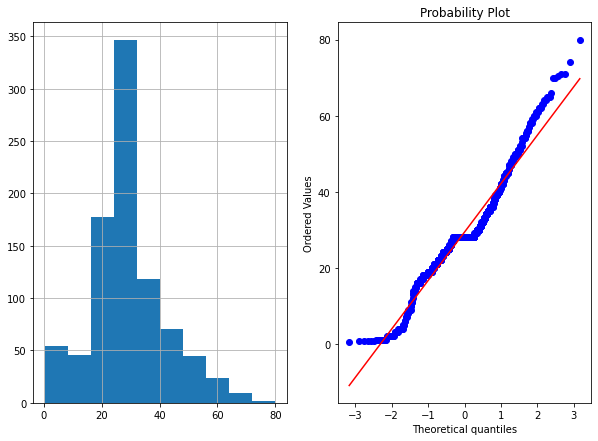

In [137]:
plot_data(log_titanic,'Age')

In [138]:
log_titanic['Age_log']=np.log(log_titanic['Age'])

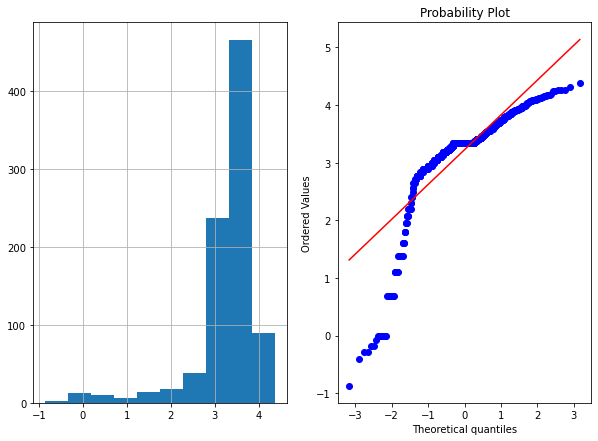

In [142]:
plot_data(log_titanic,'Age_log')    #sohere the data is not falling on the straight line ...so it is not good in probability plot

In [143]:
#Reciprocal Transformation


log_titanic['Age_reciproca']=1/log_titanic['Age']

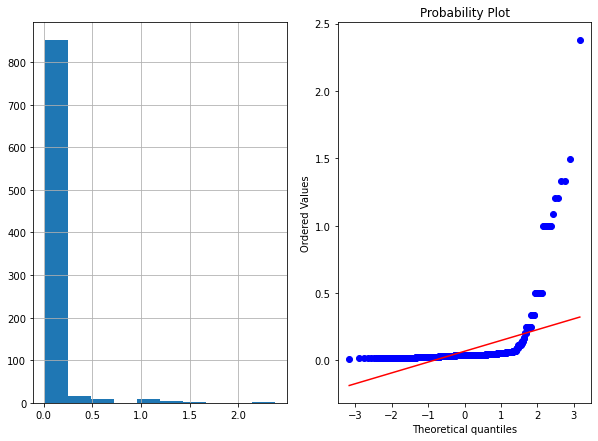

In [144]:
plot_data(log_titanic,'Age_reciproca') 

In [145]:
#Sq.root transformation

log_titanic['Age_sqrt']=(log_titanic['Age'])**0.5

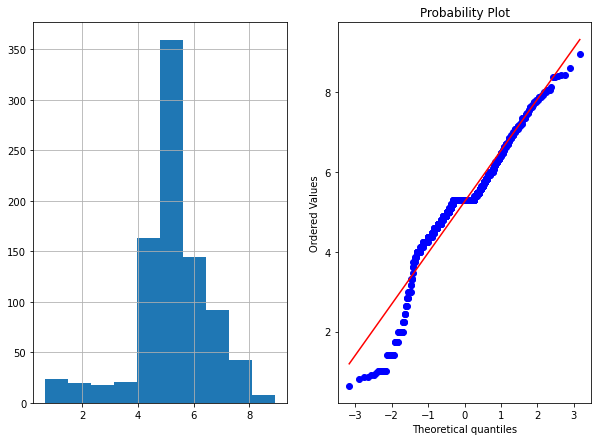

In [149]:
plot_data(log_titanic,'Age_sqrt')

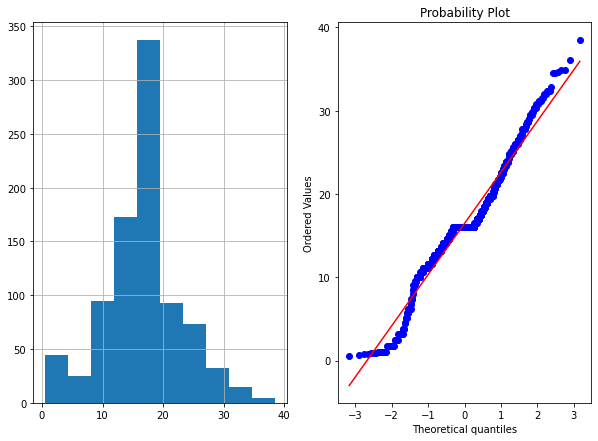

In [150]:
#Exponential Transformation


log_titanic['Age_exponen']=(log_titanic['Age'])**(1/1.2)


plot_data(log_titanic,'Age_exponen')

# boxcox Transformation

y(λ) = (y λ – 1) / λ


In [152]:
log_titanic['Age_boxcox'],parametre=stat.boxcox(log_titanic['Age'])

In [153]:
parametre

0.7964531473656952

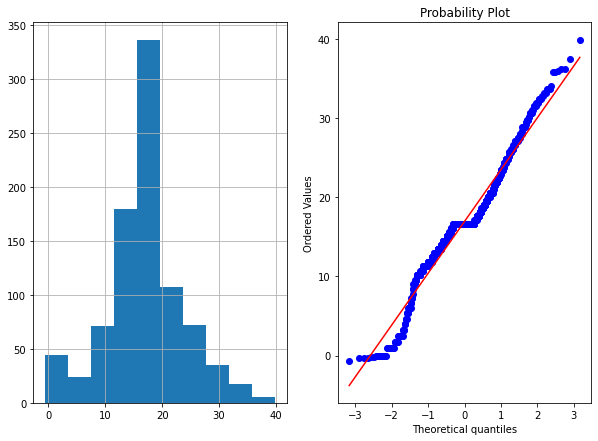

In [154]:
plot_data(log_titanic,'Age_boxcox')

# Rough

In [157]:
titanic=pd.read_csv('titanic.csv',usecols=['Age','Fare'])
titanic.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [158]:
features_with_titanic=[features for features in titanic.columns]
features_with_titanic
    

['Age', 'Fare']

In [181]:
# for loop to divide two values (age & fare columns)

for i,j in titanic.iterrows():
    titanic["divide"]=j['Fare']/j['Age']



In [182]:
titanic.head()

,Age,Fare,divide,"(0, divide)","(1, divide)","(2, divide)","(3, divide)","(4, divide)","(5, divide)","(6, divide)",...,"(881, divide)","(882, divide)","(883, divide)","(884, divide)","(885, divide)","(886, divide)","(887, divide)","(888, divide)","(889, divide)","(890, divide)"
0,22.0,7.2500,0.242188,0.329545,1.875876,0.304808,1.517143,0.23,NaN,0.960417,...,0.239267,0.478032,0.375,0.282,0.746795,0.481481,1.578947,NaN,1.153846,0.242188
1,38.0,71.2833,0.242188,0.329545,1.875876,0.304808,1.517143,0.23,NaN,0.960417,...,0.239267,0.478032,0.375,0.282,0.746795,0.481481,1.578947,NaN,1.153846,0.242188
2,26.0,7.9250,0.242188,0.329545,1.875876,0.304808,1.517143,0.23,NaN,0.960417,...,0.239267,0.478032,0.375,0.282,0.746795,0.481481,1.578947,NaN,1.153846,0.242188
3,35.0,53.1000,0.242188,0.329545,1.875876,0.304808,1.517143,0.23,NaN,0.960417,...,0.239267,0.478032,0.375,0.282,0.746795,0.481481,1.578947,NaN,1.153846,0.242188
4,35.0,8.0500,0.242188,0.329545,1.875876,0.304808,1.517143,0.23,NaN,0.960417,...,0.239267,0.478032,0.375,0.282,0.746795,0.481481,1.578947,NaN,1.153846,0.242188


In [183]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
